In [186]:
import json
import matplotlib.pyplot as plt
from geenuff.base import types
from dna_features_viewer import GraphicFeature, GraphicRecord

In [195]:
# TODO
class Transcript:
     def __init__(self, is_fully_contained, features, type, id, overlaps, given_name):
        self.is_fully_contained = is_fully_contained
        self.features = features
        self.type = type
        self.id = id
        self.overlaps = overlaps
        self.given_name = given_name

class SuperLocus:
    def __init__(self, is_fully_contained=None, transcripts=None, type=None, id=None, overlaps=None, given_name=None):
        self.is_fully_contained = is_fully_contained
        self.transcripts = transcripts
        self.type = type
        self.id = id
        self.overlaps = overlaps
        self.given_name = given_name
    
class CoordinatePiece:
    def __init__(self, seqid, id, sequence, start, end):
        self.seqid = seqid
        self.id = id
        self.sequence = sequence
        self.start = start
        self.end = end

In [196]:
# load example
example_json = "example_data.json"
example_data = None
with open(example_json) as json_file:
    example_data = json.load(json_file)

In [197]:
# todo
class GeenuffGraphicRecord(GraphicRecord):
    pass

# todo
def color(geenuff_feature_name):
    valid = [t.value for t in types.GeenuffFeature]
    if not geenuff_feature_name in valid:
        raise Exception("{} is not a valid GeenuffFeature name".format(geenuff_feature_name))
    colmap = {
       'geenuff_transcript':'#00bfff',
       'geenuff_cds': '#ba55d3',
       'geenuff_intron': '#ffdab9',
       'missing_utr_5p':'#dc143c' ,
       'missing_utr_3p' :'#dc143c',
       'empty_super_locus' :'#dc143c',
       'missing_start_codon' :'#dc143c',
       'missing_stop_codon' :'#dc143c',
       'wrong_starting_phase' :'#dc143c',
       'mismatched_ending_phase' :'#dc143c',
       'overlapping_exons' :'#dc143c',
       'too_short_intron' :'#dc143c'
    }
    return colmap.get(geenuff_feature_name, '#c0c0c0')

def convert_strand_info(geenuff_is_plus_strand): #todo
    #print(geenuff_is_plus_strand)
    if geenuff_is_plus_strand:
        return 0
    else:
        return 0
    

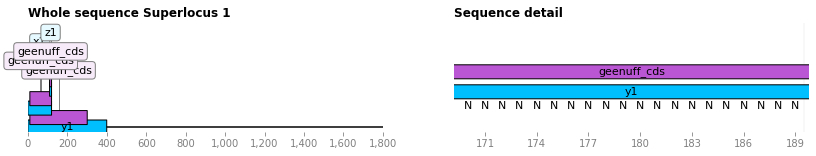

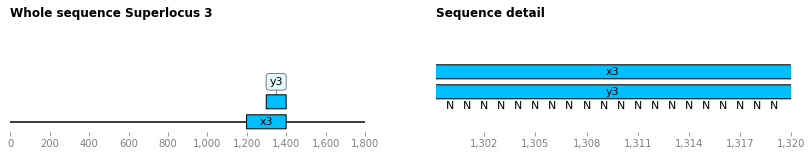

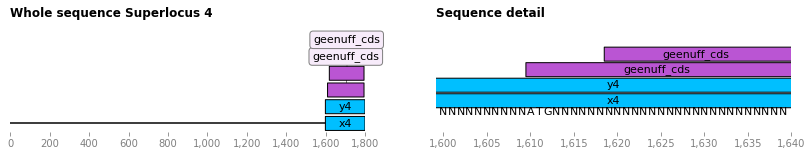

In [199]:
superloci = []
coordinatepieces = []
zoom = {}
zoom["1"] = (170,190)
zoom["3"] = (1300,1320)
zoom["3"] = (1300,1320)
zoom["4"] = (1600,1640)


for item in example_data:
    super_loci = item['super_loci']
    coordinate_piece = item['coordinate_piece']
    
    # for vis:
    seq = coordinate_piece['sequence']

    #for c in coordinate_piece:
    #    coordinatepieces.append(c)
    #print(coordinate_piece)
    for sl in super_loci:
        features = []
        #print(sl,"\n")
        #todo
        #slo  = SuperLocus(is_fully_contained=sl["is_fully_contained"], transcripts=[])
        sl_transcripts = sl['transcripts']
        for sl_t in sl_transcripts:
            for feature in sl_t["features"]:
                #print(feature['is_plus_strand'])
                if feature['type'] in ['geenuff_intron']:
                    pass
                elif feature['type'] in ['geenuff_transcript']:
                    features.append(
                        GraphicFeature(
                            start=feature["start"], 
                            end=feature["end"], 
                            strand=convert_strand_info(feature['is_plus_strand']), #todo
                            color=color(feature['type']),label=feature['given_name']), 
                    )
                else:
                    features.append(
                        GraphicFeature(
                            start=feature["start"], 
                            end=feature["end"], 
                            strand=convert_strand_info(feature['is_plus_strand']), #todo
                            color=color(feature['type']),label=feature['type']), 
                    )
        record = GraphicRecord(sequence=seq, features=features)
        zoom_start, zoom_end = zoom[str(sl["id"])]  # coordinates of the "detail"
        cropped_record = record.crop((zoom_start, zoom_end))
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 2))
        ax1.set_title("Whole sequence Superlocus "+str(sl["id"]), loc='left', weight='bold')
        record.plot(ax=ax1)
        
        cropped_record.plot_translation(ax=ax2, location=(400, 400),
                                fontdict={'weight': 'bold'})
        cropped_record.plot(ax=ax2, plot_sequence=True)
        ax2.set_title("Sequence detail", loc='left', weight='bold')

        fig.savefig('example_'+str(sl["id"])+'.png', bbox_inches='tight')        
